# **Task-8 : Clustering with K-Means**

# **Step-1 : Import Require Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Silhoutte score : It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

# The Silhouette Score is a metric used to evaluate the quality of clusters created by algorithms like K-Means.

# **Step-2 : Load the dataset**

In [7]:
mall = pd.read_csv("C:/Users/HP/Downloads/archive/Mall_Customers.csv")
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Step-3 : Basic EDA and data cleaning**

In [9]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
mall = mall.drop('CustomerID', axis=1)

In [13]:
mall['Gender'] = mall['Gender'].map({'Male':0,'Female':1})

In [15]:
mall.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


# **Step-4 : PCA for 2D visualization**

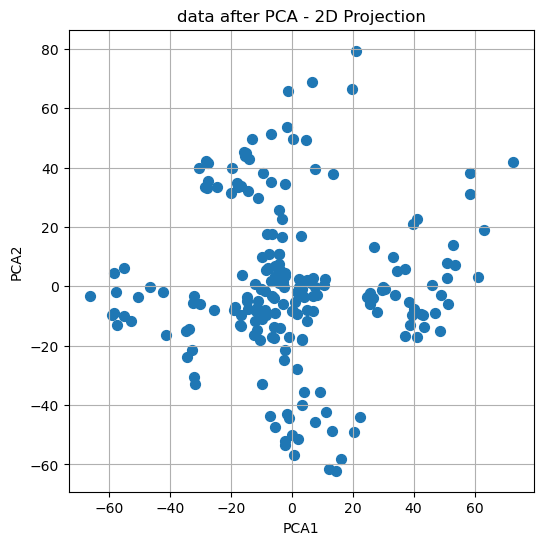

In [17]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(mall)

plt.figure(figsize=(6,6))
plt.scatter(pca_data[:,0],pca_data[:,1],s=50)
plt.title('data after PCA - 2D Projection')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.savefig('PCA.png')
plt.show()

# **Step-5 : Elbow Method to find Optimal K**

# Inertia : Inertia is the sum of squared distances between each point and the centroid of its assigned cluster.

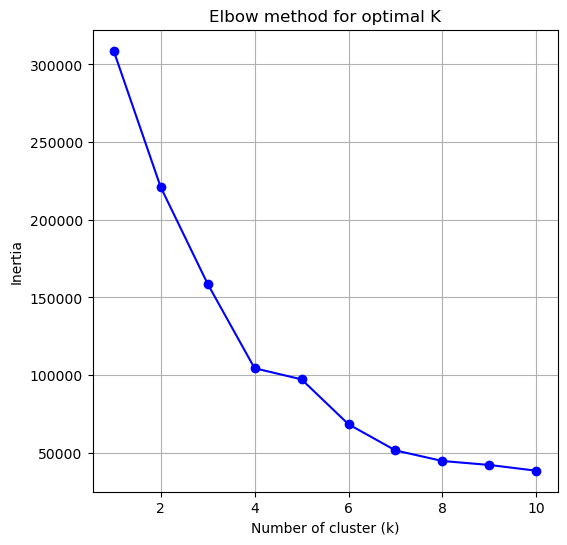

In [19]:
inertia = []
k_range = range(1,11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(mall)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,6))
plt.plot(k_range,inertia,'bo-')
plt.xlabel('Number of cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal K')
plt.grid(True)
plt.savefig('Elbow method.png')
plt.show()

# **Step-6 : Fit K-Means Model**

In [81]:
kmeans = KMeans(n_clusters=4, random_state=42)
mall['Cluster'] = kmeans.fit_predict(mall)

print(mall.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0   19                  15                      39        2
1       0   21                  15                      81        2
2       1   20                  16                       6        0
3       1   23                  16                      77        2
4       1   31                  17                      40        0


# **Step-7 : Visualize the clusters**

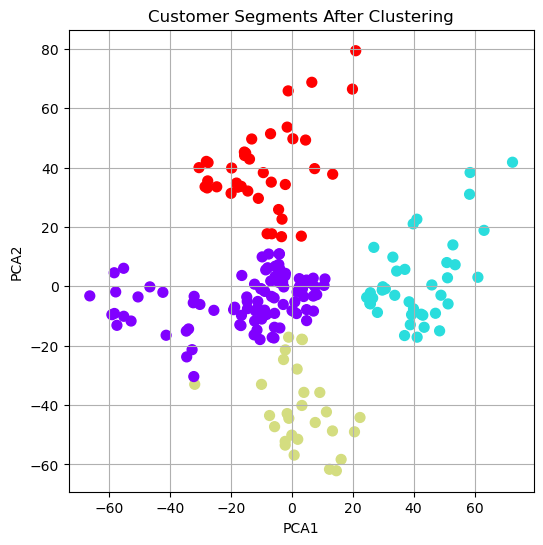

In [83]:
pca_cluster = PCA(n_components=2)
cluster_data = pca_cluster.fit_transform(mall.drop('Cluster',axis=1))

plt.figure(figsize=(6,6))
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=mall['Cluster'], cmap='rainbow', s=50)
plt.title('Customer Segments After Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.savefig('clustering scatter plot.png')
plt.show()

# **Step-8 : Evaluate with Silhouette Score**

In [85]:
score = silhouette_score(mall.drop('Cluster', axis=1), mall['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.4052954330641215


# Interpretation : The clustering quality is moderate

when value of k=5 Silhouette score :  0.3574050351346702

when k=3 Silhouette Score : 0.33545193002465656

when k=6 Silhouette Score : 0.41532495778518114